# Python
FizzBuzz

In [2]:
def fizz_buzz():
    for i in xrange(1, 101):
        if i % 5 == 0 and i % 3 == 0:
            print 'FizzBuzz'
        elif i % 3 == 0:
            print 'Fizz'
        elif i % 5 == 0:
            print 'Buzz'
        else:
            print i

Сотое число Фибоначчи

In [10]:
import numpy as np
from numpy.linalg import matrix_power

def fib(n):
    M = np.array([[1L, 1L], [1L, 0L]], dtype=object)
    M = matrix_power(M, n - 1)
    return M[0, 0]

fib(100)

354224848179261915075L

# Numpy
Аналог numpy.linspace с циклами

In [17]:
def my_loop_linspace(start, stop, num=50, endpoint=True, retstep=False):
    if endpoint:
        step = (stop - start) / float(num - 1)
    else:
        step = (stop - start) / float(num)
    res = []
    for i in xrange(num):
        res.append(start + i*step)
    if retstep:
        return res, step
    return res

my_loop_linspace(2, 3, 5)

[2.0, 2.25, 2.5, 2.75, 3.0]

Аналог numpy.linspace через list comprehension

In [20]:
def my_list_linspace(start, stop, num=50, endpoint=True, retstep=False):
    if endpoint:
        step = (stop - start) / float(num - 1)
    else:
        step = (stop - start) / float(num)
    if retstep:
        return [start + i*step for i in xrange(num)], step
    return [start + i*step for i in xrange(num)]

my_list_linspace(2, 3, 5, False, True)

([2.0, 2.2, 2.4, 2.6, 2.8], 0.2)

Сравним производительность всех трех вариантов

In [28]:
from time import time
def get_perfomance(func):
    start = time()
    func(10, 100, 10000000)
    end = time()
    return end - start

In [29]:
get_perfomance(my_loop_linspace)

4.3960490226745605

In [30]:
get_perfomance(my_list_linspace)

3.2853798866271973

In [31]:
get_perfomance(np.linspace)

0.6087541580200195

# Matplotlib

In [9]:
%matplotlib inline

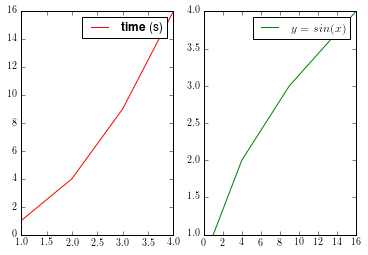

In [20]:
from matplotlib import pylab as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.subplot(1, 2, 1)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r', label=r'\textbf{time} (s)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot([1, 4, 9, 16], [1, 2, 3, 4], 'g', label=r'$y=sin(x)$')
plt.legend()
plt.savefig('my_plot.svg')